In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

KeyboardInterrupt: 

In [3]:
# Define directories
train_dir = "C:\\Users\\NITRO\\Desktop\\kulit2\\Train"
val_dir = "C:\\Users\\NITRO\\Desktop\\kulit2\Validation"
test_dir = "C:\\Users\\NITRO\\Desktop\\kulit2\Test"

<>:3: SyntaxWarning: invalid escape sequence '\V'
<>:3: SyntaxWarning: invalid escape sequence '\V'
C:\Users\NITRO\AppData\Local\Temp\ipykernel_9448\2901662869.py:3: SyntaxWarning: invalid escape sequence '\V'
  val_dir = "C:\\Users\\NITRO\\Desktop\\kulit2\Validation"


## **SHOWCASE SOME DATA**

In [4]:
import os
import random
import cv2

train_data = []
val_data = []
folder_image_count_train = {}
folder_image_count_val = {}

# Load training data
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    folder_image_count_train[folder] = 0
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        train_data.append((img, folder))
        folder_image_count_train[folder] += 1

# Load validation data
for folder in os.listdir(val_dir):
    folder_path = os.path.join(val_dir, folder)
    folder_image_count_val[folder] = 0
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        val_data.append((img, folder))
        folder_image_count_val[folder] += 1

# Print the number of images in each folder
print("Number of images in each training folder:")
for folder, count in folder_image_count_train.items():
    print(f"{folder}: {count}")

print("\nNumber of images in each validation folder:")
for folder, count in folder_image_count_val.items():
    print(f"{folder}: {count}")


Number of images in each training folder:
Acne and Rosacea: 192
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 192
Atopic Dermatitis: 192
Eczema: 192
Melanoma Skin Cancer Nevi and Moles: 192
Psoriasis pictures Lichen Planus and Related Diseases: 192
Seborrheic Keratoses and other Benign Tumors: 192
Tinea Ringworm Candidiasis and other Fungal Infections: 192

Number of images in each validation folder:
Acne and Rosacea: 29
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 29
Atopic Dermatitis: 29
Eczema: 29
Melanoma Skin Cancer Nevi and Moles: 29
Psoriasis pictures Lichen Planus and Related Diseases: 29
Seborrheic Keratoses and other Benign Tumors: 29
Tinea Ringworm Candidiasis and other Fungal Infections: 29


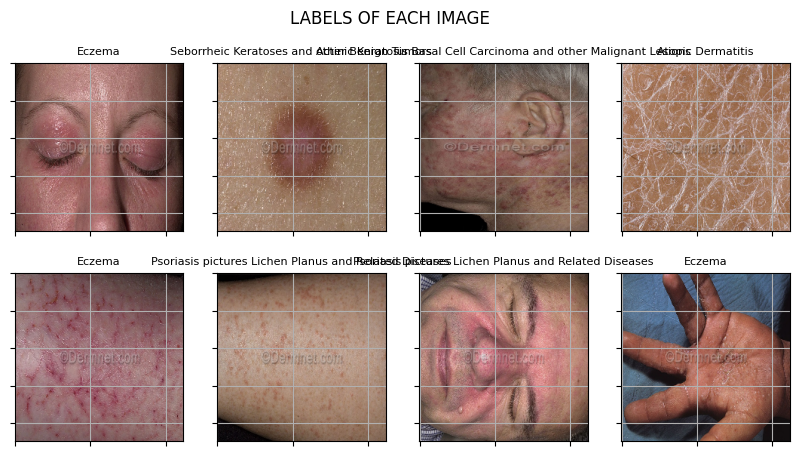

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(10,5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label, fontdict={'fontsize': 8})
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

## **CREATE MODEL**

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
base_model.trainable = False

## Fully Connected Layer

In [8]:
num_classes = 8
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **PREPROCESS DATA**

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# train_data = [(preprocess_input(input), label) for input, label in train_data]
# val_data = [(preprocess_input(input), label) for input, label in val_data]

X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

## **TRAIN**

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    mode='min'
)

In [12]:
EPOCHS = 15
BATCH_SIZE = 64
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                   epochs = EPOCHS, batch_size=BATCH_SIZE,callbacks=[custom_early_stopping])

model.save('newcnn5.h5')

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.2829 - loss: 2.9966 - val_accuracy: 0.6638 - val_loss: 0.9695
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.6862 - loss: 0.9417 - val_accuracy: 0.7845 - val_loss: 0.7041
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7758 - loss: 0.6754 - val_accuracy: 0.8448 - val_loss: 0.5120
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8486 - loss: 0.4849 - val_accuracy: 0.8621 - val_loss: 0.3983
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9140 - loss: 0.3081 - val_accuracy: 0.9138 - val_loss: 0.3024
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9596 - loss: 0.2262 - val_accuracy: 0.9526 - val_loss: 0.2340
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9775 - loss: 0.1664 - val_accuracy: 0.9526 - val_loss: 0.1778
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9874 - loss: 0.1228 - val_accuracy: 0.9784 - val_loss

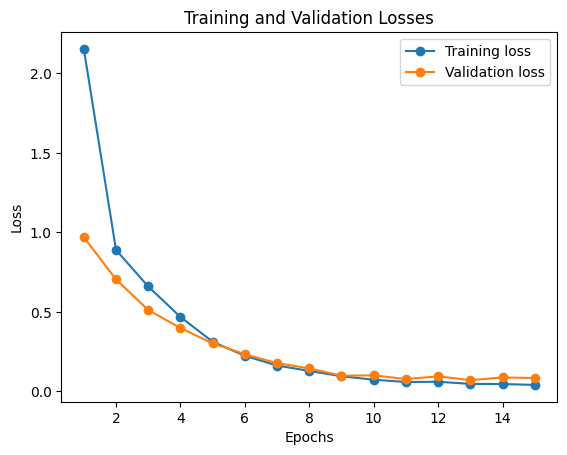

In [13]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

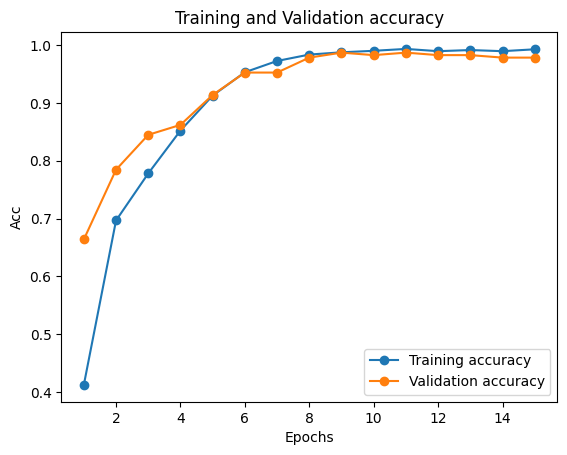

In [14]:
# Get the training and validation losses from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training accuracy', marker='o')
plt.plot(epochs, val_loss,label='Validation accuracy', marker='o')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

# Show the plot
plt.show()

## **PREDICT**

In [15]:
from tensorflow.keras.models import load_model

In [16]:
print("Model Input Shape:", model.input_shape)

Model Input Shape: (None, 224, 224, 3)


In [26]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the trained model
model_path = 'newcnn5.h5'
model = load_model(model_path)

# Define the class names
class_names = ["Acne", "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions", "Atopic Dermatitis", "Eczema", "Melanoma Skin Cancer Nevi and Moles", "Psoriasis pictures Lichen Planus and Related Diseases", "Seborrheic Keratoses and other Benign Tumors", "Tinea Ringworm Candidiasis and other Fungal Infections"]

# Function to preprocess input image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)
    return img

# Example usage for a single image
image_path = "C:\\Users\\NITRO\\Desktop\\Penyakit Kulit\\Test\Melanoma Skin Cancer Nevi and Moles\\Melanoma Skin Cancer Nevi and Moles_ (70).jpg"
input_image = preprocess_image(image_path)

# Make prediction
predictions = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

print("Predicted class:", predicted_class_name)

<>:22: SyntaxWarning: invalid escape sequence '\M'
<>:22: SyntaxWarning: invalid escape sequence '\M'
C:\Users\NITRO\AppData\Local\Temp\ipykernel_9448\3342783893.py:22: SyntaxWarning: invalid escape sequence '\M'
  image_path = "C:\\Users\\NITRO\\Desktop\\Penyakit Kulit\\Test\Melanoma Skin Cancer Nevi and Moles\\Melanoma Skin Cancer Nevi and Moles_ (70).jpg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Melanoma Skin Cancer Nevi and Moles


Model for epoch 1 not found.


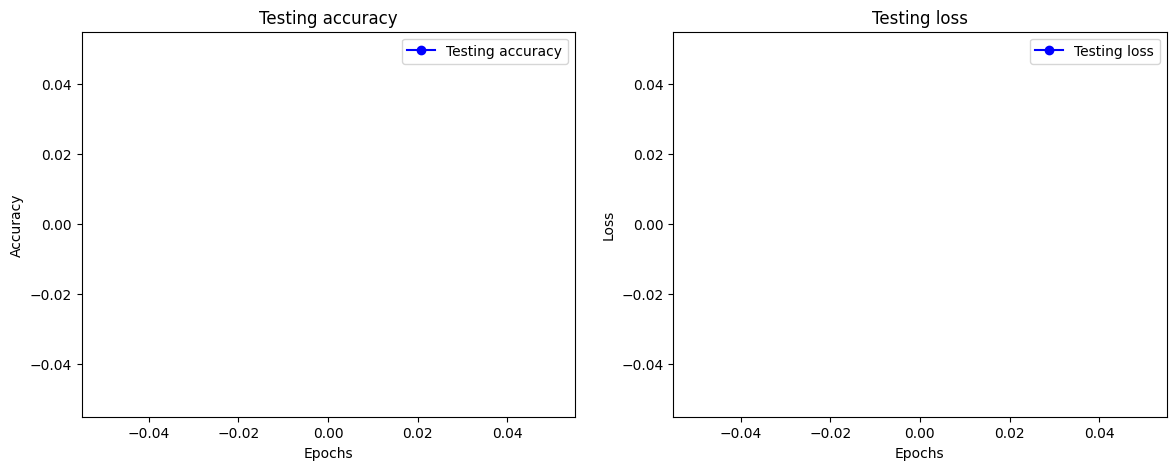

In [9]:
# %%
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Define directories
test_dir = "C:\\Users\\NITRO\\Desktop\\kulit2\\Test"

# Load the trained model
model_path = 'newcnn5.h5'
model = load_model(model_path)

# Define the class names
class_names = ["Acne", "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions", "Atopic Dermatitis", "Eczema", "Melanoma Skin Cancer Nevi and Moles", "Psoriasis pictures Lichen Planus and Related Diseases", "Seborrheic Keratoses and other Benign Tumors", "Tinea Ringworm Candidiasis and other Fungal Infections"]

# Load test data
test_data = []
test_labels = []

for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(folder)

# Preprocess test data
X_test = preprocess_input(np.array(test_data))

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(test_labels)

# Evaluate the model on the test data
loss, acc = model.evaluate(X_test, to_categorical(y_test_encoded, num_classes=len(class_names)), verbose=0)

# Create arrays for storing test accuracy and loss
test_accuracy = [acc] * 15  # Assuming 15 epochs, adjust if needed
test_loss = [loss] * 15  # Assuming 15 epochs, adjust if needed

# Create an array representing the number of epochs
epochs = range(1, len(test_accuracy) + 1)

# Plot testing accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, test_accuracy, 'bo-', label='Testing accuracy')
plt.title('Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, test_loss, 'bo-', label='Testing loss')
plt.title('Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
